In [1]:
import numpy as np 
import pandas as pd 

In [2]:
jobdescription = pd.read_excel('CompiledAnalyticsData_excel.xlsx',index=True)

jobdescription.head(3)

,ID,Job Class,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Clean Job Title,Clean Job Description,skills
0,0,Data Analyst,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,1,DATA ANALYST CENTER IMMIGRATION JUSTICE CIJ,enjoy rely like cij jazzhr st effort face cent...,"['r', 'python', 'sql', 'aws']"
1,1,Data Analyst,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1,QUALITY DATA ANALYST,hoc hedis sql ca2020 PLSQL health manual timel...,"['hedis', 'sql', 'r', 'sas', 'excel', 'msword']"
2,2,Data Analyst,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1,SENIOR DATA ANALYST INSIGHTS GAME TEAM CUSTOME...,tabl sql looker aspect like idea broad better ...,"['sql', 'looker', 'r', 'powerbi', 'excel', 'ch..."


In [3]:
jobdescription['Clean Job Description']= jobdescription['Job Description'].replace('[^A-Za-z0-9]+', ' ',regex=True)

jobdescription.head(3)

,ID,Job Class,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Clean Job Title,Clean Job Description,skills
0,0,Data Analyst,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,1,DATA ANALYST CENTER IMMIGRATION JUSTICE CIJ,Are you eager to roll up your sleeves and harn...,"['r', 'python', 'sql', 'aws']"
1,1,Data Analyst,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1,QUALITY DATA ANALYST,Overview Provides analytical and technical sup...,"['hedis', 'sql', 'r', 'sas', 'excel', 'msword']"
2,2,Data Analyst,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1,SENIOR DATA ANALYST INSIGHTS GAME TEAM CUSTOME...,We re looking for a Senior Data Analyst who ha...,"['sql', 'looker', 'r', 'powerbi', 'excel', 'ch..."


In [4]:
!pip install nltk

In [5]:
import string
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords

In [6]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [7]:
newstopwords=stopwords.words("English") + ['play','will','within','one','use','make','way','across','need','care','help','high','must','area','state','people','member','may','well','using','etc','make','year','office',
                                           'us','change','part','access','time','able','issue','task','duties','day','field','meet','hand','first','ensure','best','sexual','gender','global','world','race','regard','client',
                                           'http','re','ad','self','highly','key','source','make','come','full','result','inc','build','end','color','years','work','role','family','date','team','equal','com',
                                           'u','law','www','com','please','life','also','level','new','non','system','service','sex','age','email','job','pay','duty','take','ha','a','b','d','e','f','g','strong',
                                          'status','offer','good','term','matter','open','get','person','ideal','place','title','go','inc','see','hour','tx','ca','skill','strong','month','pay',
                                          'degree','design','tool','build','client','drive','large','create','plan','user','lead','value','apply','review','learn','fast','assist','detail','manage','impact','type',
                                           'make','origin','make','policy','need','join','goal','expert','group','hire','need','method','action','focus','basis','cross','make','based','degree','skill','year','origin','austin',
                                           'need','pace','basic','right','wide','others','multi','pay','want','use','long','give','small','hire']
                                          

In [8]:
WNlemma = nltk.WordNetLemmatizer()


def pre_process(text): 
    tokens = nltk.word_tokenize(text)
    tokens=[t.lower() for t in tokens]
    tokens=[t for t in tokens if t not in string.punctuation]
    tokens=[ t for t in tokens if not t.isnumeric()]
    tokens=[WNlemma.lemmatize(t) for t in tokens]
    tokens=[word for word in tokens if word not in newstopwords]
    text_after_process=' '.join(tokens)
    return(text_after_process)

#Apply the function on each document
jobdescription['Clean Job Description'] = jobdescription['Clean Job Description'].apply(pre_process)

In [9]:
jobdescription['Clean Job Description'][:10]

0    eager roll sleeve harness data enjoy sifting c...
1    overview provides analytical technical support...
2    looking senior data analyst love mentorship da...
3    requisition numberrr remote yes collaborate in...
4    fanduel fanduel class brand product built mind...
5    cubist cubist systematic strategy premier inve...
6    two sigma different kind investment manager si...
7    data science analyst experienced location york...
8    data analyst integral commercial data analytic...
9    riskified ai platform powering ecommerce revol...
Name: Clean Job Description, dtype: object

In [10]:
length=jobdescription['Clean Job Description'].apply(len)
length[:100]

0     4654
1     3461
2     2919
3     3373
4     2143
      ... 
95    1442
96    1822
97     414
98    1481
99    1859
Name: Clean Job Description, Length: 100, dtype: int64

In [11]:
jobdescription['Clean Job Description']=jobdescription['Clean Job Description'].replace(['pl sql','masters','git github','github','microsoft word','ms word','powerpoint','power point','data governance','statistics','mathematics','computer science','data analyst','big data','modelling','microsoft office','ms office','java script','javascript','deep learning','tableau','engineering','datasets','data sets','dataset','data set','dashboards','dashboard','databases','data base',' sa ','regression','clustering','artificial intelligence',' ms ','mongodb','tensorflow','rapidminer','rainstor','elasticsearch','elastic search','airflow','kubernetes','tensor flow','air flow','power bi','scrum master','sisense','data studio','grafana','mapreduce','couchbase','blockchain','spotfire','chartio','metabase','cassandra','periscope data','dynamodb','firebase','big query',' teradata ','ad hoc','machine learning',' natural language processing ','decision tree','neural network','graduate','undergraduate','bachelor','analtyical','analytics','analysis','classification','business analyst','business intelligence'],['PLSQL','master','GIT','GIT','msword','msword','PPT','PPT','DAG','stats','math','cse','anali','bdata','model','mso','mso','jas','jas','deepl','tabl','engg','dset','dset','dset','dset','dashb','dashb','db','db',' sas ','resn','cstg','ai','master','mgd','tefw','rpdm','rst','elsch','elsch','afw','kbnts','tefw','afw','bi','scr','sss','dtd','gfn','mrc','ccb','bcn','spfr','chto','mtbse','ssdr','prsc','dymd','fibs','bqry',' tdata ','adhoc','maclrg',' nlp ','dctre','nurnet','grad','undergrad','bach','ana','anacs','anasis','clas','busst','busnc'],regex=True)

In [12]:
length1=jobdescription['Clean Job Description'].apply(len)
length1[:100]

0     4577
1     3337
2     2804
3     3337
4     2106
      ... 
95    1412
96    1798
97     402
98    1439
99    1745
Name: Clean Job Description, Length: 100, dtype: int64

In [13]:
def tokenization(text):
    tokens=nltk.word_tokenize(text)
    tokens=[t for t in tokens if len(t)<7]
    tokens=set(tokens)
    tokens=' '.join(tokens)
    return(tokens)

jobdescription['Clean Job Description'] = jobdescription['Clean Job Description'].apply(tokenization)

In [14]:
jobdescription['Clean Job Description']=jobdescription['Clean Job Description'].replace(['DAG',' stats ',' math ',' cse ',' anali ',' bdata ',' model ',' mso ',' jas ',' deepl ',' tabl ',' engg ',' dset ',' dashb ',' db ',' teg ',' resn ',' cstg ',' mgd ',' tefw ',' rpdm ',' rst ',' elsch ',' afw ',' ai ',' kbnts ',' bi ',' scr ',' sss ',' dtd ',' gfn ',' mrc ',' ccb ',' bcn ',' spfr ',' chto ',' mtbse ',' ssdr ','data',' prsc ',' dymd ',' fibs ',' big ',' set ',' bqry ',' tdata ','adhoc','maclrg',' nlp ','dctre','nurnet',' grad ',' undergrad ',' bach ',' ana ',' anacs ',' anasis ',' clas ',' busst ',' busnc '],['datagovernance',' statistics ',' mathematics ',' computerscience ',' analyst ',' bigdata ',' modelling ',' msoffice ',' javascript ',' deeplearning ',' tableau ',' engineering ',' dataset ',' dashborads ',' databases ',' text mining ',' regression ',' clustering ',' mongodb ',' tensorflow ',' rapidminer ',' rainstor ',' elasticsearch ',' airflow ',' artificialintelligence ',' kubernetes ',' powerbi ',' scrum',' sisense ',' datastudio ',' grafana ',' mapreduce ',' couchbase ',' blockchain ',' spotfire ',' chartio ',' metabase ',' cassandra ','',' periscopedata',' dynamodb ',' firebase ','','',' bigquery ',' teradata ','adhoc','machine learning','natural launguage processing','decision tree','neural network',' graduate ',' undergraduate ',' bachelor ',' analytical ',' analytics ',' analysis ',' classification ',' businessanalyst',' businessintelligence '],regex=True)

In [15]:
jobdescription['Clean Job Description'][:10]

0    taking party call record set impede real eager...
1    train trend PLSQL topic dashborads computersci...
2    dset dublin iconic dashborads master acting li...
3    record giving hobby plenty sniff like enjoy bu...
4    fan sport set app foxbet really medium real co...
5    call word set smooth query firm option asset l...
6    gym order room posse sick firm launch computer...
7    loss early score computerscience master 30 ana...
8    unique boost globe big medium stock posse news...
9    ai vision trend news quick real stock domain o...
Name: Clean Job Description, dtype: object

In [16]:
length2=jobdescription['Clean Job Description'].apply(len)
length2[:100]

0     656
1     328
2     497
3     576
4     438
     ... 
95    217
96    435
97    103
98    232
99    280
Name: Clean Job Description, Length: 100, dtype: int64

In [17]:
jobdescription.to_excel('CompiledAnalyticsData_excel.xlsx')

In [18]:
def tokenizations(text):
    tokens=nltk.word_tokenize(text)
    return(tokens)

tok = jobdescription['Clean Job Description'] .apply(tokenizations)

In [19]:
skill=['web','linux','java','c','r','python','sql','plsql','oracle','excel','sap','sas','cloud','plsql','postgresql','bigdata','hedis','hadoop','spark','teradata','pig','hive','deeplearning','kafta','hbase','splunk','presto','rapidminer','knime','hunk','beam','tensorflow','mongodb','aws','machinelaerning','mysql','etl','rainstor','airflow','kubernetes','docker','plotly','knime','splunk','elasticsearch','rainstor','ppt','msword',' r ','looker','powerbi','tableau','azure','nosql','git','javascript','artificialintelligence','scrum','spss','cassandra','orange','mapreduce','couchbase','ems','blockchain','orange','spotfire','chartio','cognos','metabase','sisense','qlik','redash','grafana','datastudio','orange','mode','periscopedata','pmp','api','dynamodb','oltp','olap','firebase','redis','sap','msoffice','bigquery','teradata','machine learning','decision tree','neural network','database','adhoc','dashboard','mining','deeplearning','nlp','modelling','regression','clustering','dataanalsyt','mathematics','engineering','statistics','phd','master','businessintelligence','classification','analysis','analytical','analytics','bachelor','graduate','undergraduate','businessanalyst','master','phd','mathematics','statistics','engineering','computerscience']

In [20]:
def match(text):
    tokens=[t for t in text if(t in skill)]
    return(tokens)

jobdescription['skills']=tok.apply(match)

In [21]:
jobdescription['skills'][:50]

0                       [sql, aws, python, r, analysis]
1     [computerscience, master, analytics, hedis, ex...
2     [master, sql, engineering, phd, tableau, power...
3     [sql, engineering, tableau, etl, bachelor, ana...
4     [analytics, excel, sql, analysis, engineering,...
5     [excel, java, sql, python, bachelor, modelling...
6     [computerscience, analytics, excel, sql, analy...
7     [computerscience, master, analytics, sql, mini...
8     [computerscience, analytics, excel, sql, analy...
9         [master, analytics, sql, analysis, python, r]
10                 [master, sas, analysis, r, bachelor]
11    [sql, engineering, tableau, chartio, bachelor,...
12                 [classification, analysis, bachelor]
13    [phd, analytics, excel, sql, analysis, python,...
14                               [excel, sql, bachelor]
15      [analytics, excel, sql, engineering, python, r]
16    [analytics, tableau, sql, businessintelligence...
17    [computerscience, sql, graduate, python, b

In [22]:
jobdescription.to_excel('CompiledAnalyticsData_excel.xlsx')

In [23]:
newwords=stopwords.words("English") +['graduate','undergraduate','bachelor','analytical','analytics','analysis','classification','dataanalyst','businessanalyst','businessintelligence']

In [24]:
def newstop(text):
    tokens=nltk.word_tokenize(text)
    tokens=[word for word in tokens if word not in newwords]
    return(tokens)

tok = jobdescription['Clean Job Description'] .apply(newstop)

In [25]:
from nltk import pos_tag

x = [ c for l in tok for c in l ]
news_pos= pos_tag(x)

In [26]:
# if we want to get the lemmas of the content words in the text
def lemmaNVAR(wpos):
    lemmas = []
    for w, pos in wpos:
        if pos[0] in ('N', 'V', 'J', 'R'):
            if pos in ('NNS', 'RBR', 'RBS', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'):
                lemmas.append(WNlemma.lemmatize(w.lower(), pos = pos[0].lower()))
            elif pos in ('JJR', 'JJS'):
                lemmas.append(WNlemma.lemmatize(w.lower(), pos = 'a'))
            else:
                lemmas.append(w.lower())
    return lemmas

In [27]:
words=lemmaNVAR(news_pos)

[('sql', 5478), ('engineering', 4724), ('report', 4260), ('python', 4129), ('computerscience', 3887), ('model', 3357), ('test', 3214), ('excel', 2838), ('make', 2686), ('health', 2510), ('cloud', 2501), ('verbal', 2490), ('analyst', 2470), ('senior', 2469), ('master', 2433), ('career', 2281), ('r', 2247), ('vision', 2120), ('leader', 2072), ('future', 2071), ('code', 2055), ('machine', 2034), ('mathematics', 2019), ('need', 2018), ('trend', 1981), ('growth', 1966), ('market', 1964), ('tableau', 1962), ('learn', 1944), ('query', 1942), ('scale', 1860), ('risk', 1852), ('solve', 1851), ('set', 1815), ('effort', 1797), ('proven', 1792), ('big', 1746), ('spark', 1745), ('java', 1729), ('metric', 1720), ('serve', 1708), ('define', 1685), ('least', 1637), ('record', 1634), ('local', 1633), ('drive', 1604), ('etl', 1587), ('track', 1582), ('case', 1576), ('idea', 1572), ('dental', 1571), ('travel', 1564), ('aws', 1561), ('dashborads', 1558), ('core', 1553), ('pay', 1513), ('staff', 1508), ('c

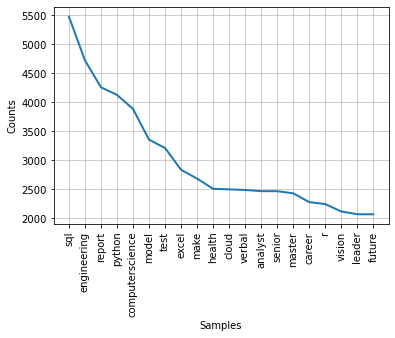

In [28]:
fd = nltk.FreqDist(words)
print(fd.most_common(100))
fd.plot(20)

In [29]:
from nltk import FreqDist
fd_words = FreqDist(words)

In [30]:
!pip install wordcloud

(-0.5, 1599.5, 799.5, -0.5)

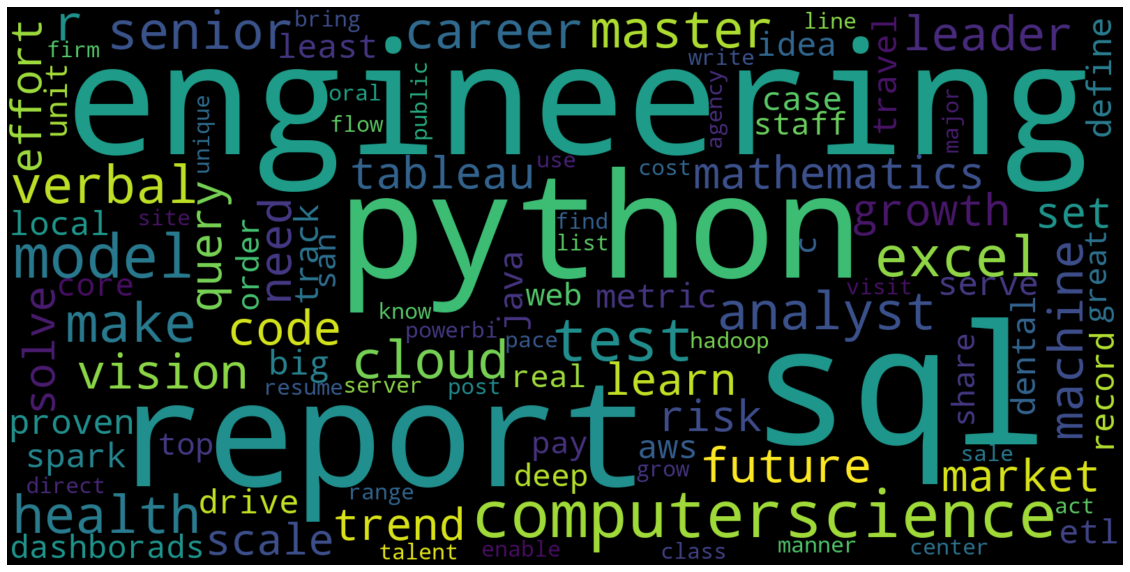

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 20))
insight = WordCloud(background_color="black",width=1600,height=800,max_words=100).generate_from_frequencies(fd_words)
plt.imshow(insight, interpolation='bilinear')
plt.axis("off")

In [ ]:
#key finding :
 
 #sql,excel,python are hot tools for analytics related jobs.Approx 50% job posting required these skills.
 #other areas one should build to enhance their career in this filed is,knowledge in hadoop,BI,R,java,bigdata,spark,tableau,cloud,aws,etl etc.
 #some additional skills like msword,powerpoint and good verbal are good to have.  
 #planning,designing,testing,reporting,metric evaluation,modelling and dashboards creation are the key steps involved in these jobs roles.
 #computer science,mathematics,engineering are the most looked upon graduate area.
 #health is one the leading industry providing data analytst job.
 #approx 20% job posting were specifically for senior level.(4 or more yr experience)
 #15% job are reserved for just locals to apply.
 #15% job require to travel.
 #atleast 20% job specifically demanded for good coding skills.
 #approx 20% requires some big data technology.An addition certification/knowledge with widen your scope of job domain.
 #20% jobs require masters while only 8% ask for phd degree.